In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation

In [3]:
data = pd.read_csv('tas_1901_2016_SDN.csv')
data.describe()

,Temperature - (Celsius),Year
count,1392.000000,1392.000000
mean,26.984203,1958.500000
std,3.807015,33.497105
min,17.324600,1901.000000
25%,23.847225,1929.750000
50%,28.349150,1958.500000
75%,30.098725,1987.250000
max,33.175600,2016.000000


In [4]:
data.columns

Index(['Temperature - (Celsius)', ' Year', ' Month', ' Country', ' ISO3'], dtype='object')

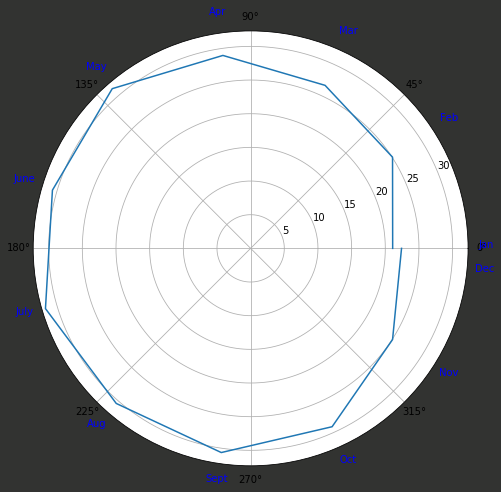

In [5]:
temp_1901 = data.loc[data[' Year']== 1901,:]

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111,projection='polar')

r = temp_1901['Temperature - (Celsius)']
theta = np.linspace(0,2*np.pi,12)

ax.plot(theta,r)

labels = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
for label,theta in zip(labels,theta):
    if label == 'Dec':
        ax.text(theta-0.1,35, label, color="blue", ha='center', fontdict={'fontsize': 10})
    else:
        ax.text(theta,35, label, color="blue", ha='center', fontdict={'fontsize': 10})


fig.set_facecolor("#323331")


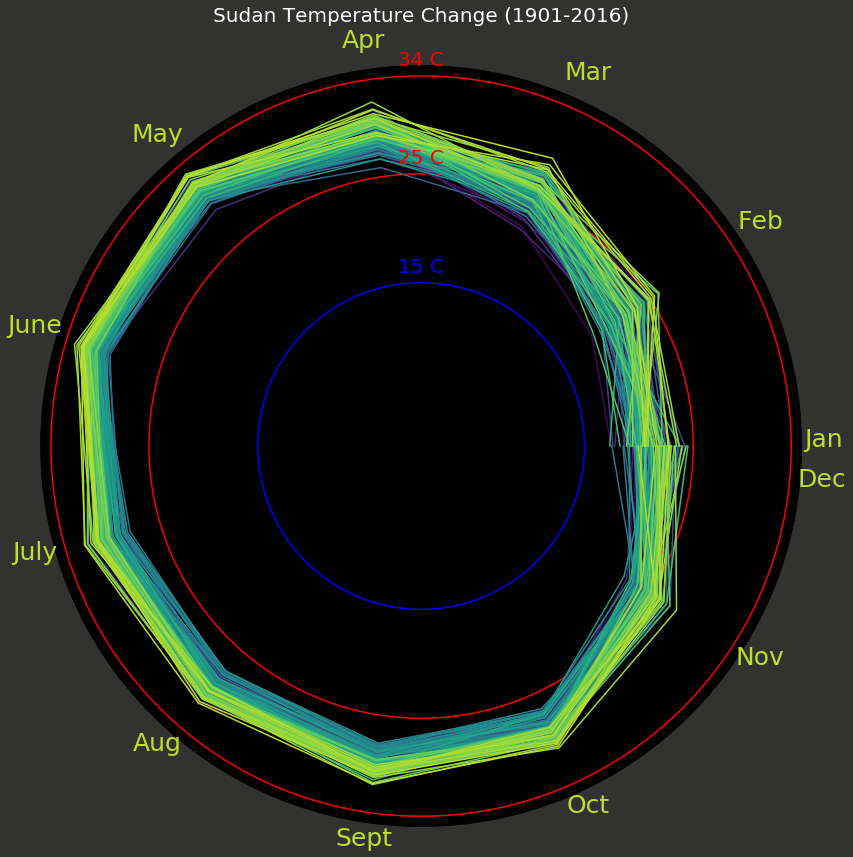

In [6]:
fig = plt.figure(figsize=(14,14))
ax = plt.subplot(111,projection='polar')

fig.set_facecolor("#323331")
ax.set_facecolor('#000100')
ax.axes.set_xticklabels([])
ax.axes.set_yticklabels([])
ax.yaxis.grid(False)
ax.xaxis.grid(False)

theta = np.linspace(0,2*np.pi,12)
years = data[' Year'].unique()

thetas = np.linspace(0, 2*np.pi, 1000)

blue_line_radii    = [15]*1000
red_line_one_radii = [25]*1000
red_line_two_radii = [34]*1000

ax.plot(thetas, blue_line_radii, c='blue')
ax.plot(thetas, red_line_one_radii, c='red')
ax.plot(thetas, red_line_two_radii, c='red')

for index,year in enumerate(years):
    r  = data.loc[data[' Year'] == year,'Temperature - (Celsius)']
    ax.plot(theta,r,c=plt.cm.viridis(index*2))
    
for label,theta in zip(labels,theta):
    if label == 'Dec':
        ax.text(theta-.1,37, label, color=plt.cm.viridis(index*2), ha='center', fontdict={'fontsize': 25})    
    else:
        ax.text(theta,37, label, color=plt.cm.viridis(index*2), ha='center', fontdict={'fontsize': 25})
        
ax.set_title("Sudan Temperature Change (1901-2016)", color='white', fontdict={'fontsize': 20})
ax.text(np.pi/2, 16, "15 C", color="blue", ha='center', fontdict={'fontsize': 20})
ax.text(np.pi/2, 26, "25 C", color="red", ha='center', fontdict={'fontsize': 20})
ax.text(np.pi/2, 35, "34 C", color="red", ha='center', fontdict={'fontsize': 20})

fig.savefig('Sudan Temperature Change (1901-2016).png')

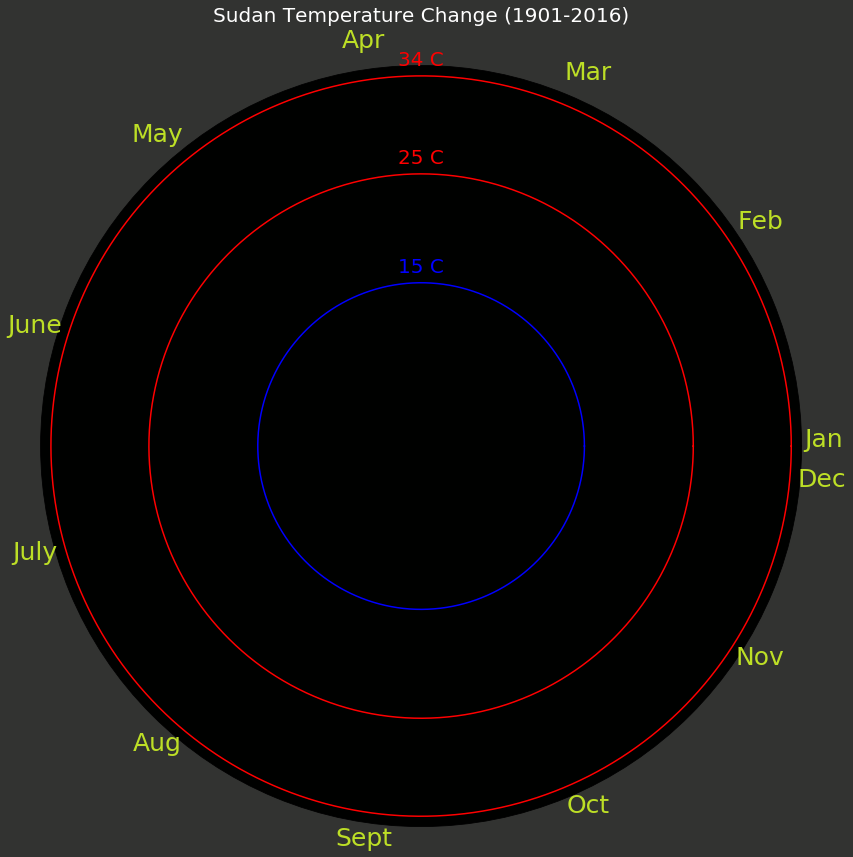

In [7]:
#fig
fig = plt.figure(figsize=(14,14))
ax = plt.subplot(111,projection='polar')

fig.set_facecolor("#323331")
ax.set_facecolor('#000100')
ax.axes.set_xticklabels([])
ax.axes.set_yticklabels([])
ax.yaxis.grid(False)
ax.xaxis.grid(False)

theta = np.linspace(0,2*np.pi,12)
years = data[' Year'].unique()

thetas = np.linspace(0, 2*np.pi, 1000)
blue_line_radii = [15]*1000
red_line_one_radii = [25]*1000
red_line_two_radii = [34]*1000

ax.plot(thetas, blue_line_radii, c='blue')
ax.plot(thetas, red_line_one_radii, c='red')
ax.plot(thetas, red_line_two_radii, c='red')

ax.set_title("Sudan Temperature Change (1901-2016)", color='white', fontdict={'fontsize': 20})
ax.text(np.pi/2, 16, "15 C", color="blue", ha='center', fontdict={'fontsize': 20})
ax.text(np.pi/2, 26, "25 C", color="red", ha='center', fontdict={'fontsize': 20})
ax.text(np.pi/2, 35, "34 C", color="red", ha='center', fontdict={'fontsize': 20})


labels = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
plots = []

for index,year in enumerate(years):
    r  = data.loc[data[' Year'] == year,'Temperature - (Celsius)']
    plot, = ax.plot(theta,r,c=plt.cm.viridis(index*2))
    date = ax.text(0,0,year, color='white', size=30, ha='center')
    plots.append([plot,date]) 
    
for label,theta in zip(labels,theta):
    if label == 'Dec':
        ax.text(theta-.1,37, label, color=plt.cm.viridis(index*2), ha='center', fontdict={'fontsize': 25})    
    else:
        ax.text(theta,37, label, color=plt.cm.viridis(index*2), ha='center', fontdict={'fontsize': 25})
            
    
animation = ArtistAnimation(fig,plots,interval=600)
animation.save('sudan_climate.gif', dpi=120, writer='pillow', savefig_kwargs={'facecolor': '#323331'})